In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
x0 = 10.0
n = 32
dx = 2*x0/n
z = 2.0
x = np.linspace(-x0, x0, n)
alpha = 1.0
beta = 1.1
m = 1.0

def oe_kinetic(i, j) :
    if (i==j): 
        t_ij =  (-1)**(i-i) * (1.0 / (2.0 * m * dx**2)) * np.pi**2 / 3.0
    else:
        t_ij = (-1)**(i-j) * (1.0 / (2.0 * m * dx**2)) * 2.0 / (i-j)**2
    return(t_ij)

def oe_sc_single_well(i, j) :
    if (i==j):
        v_ij = -z/np.sqrt(x[i-1]**2 + alpha)
    else: 
        v_ij = 0.0
    return(v_ij)

def te_kinetic(u, v) :
    i = int((u-1)/n)+1
    j = int((v-1)/n)+1
    k = ((u-1)%n)+1
    l = ((v-1)%n)+1
    t_uv = 0.0
    if (k==l):
        t_uv += oe_kinetic(i,j) 
    if (i==j):
         t_uv += oe_kinetic(k,l)
    return(t_uv)

def te_sc_single_well(u, v) :
    if (u == v):
        i = int((u-1)/n)+1
        j = ((u-1)%n)+1
        v_uv = oe_sc_single_well(i, i) + oe_sc_single_well(j, j)
        v_uv = v_uv + ((1.0)/np.sqrt(beta + (x[i-1]-x[j-1])**2))
    else:
        v_uv = 0.0
    return(v_uv)


In [29]:
h = np.zeros((n**2,n**2))
t = np.zeros((n**2,n**2))
v = np.zeros((n**2,n**2))
atol = 1e-16
for i in range(n**2):
    t[i,i] = te_kinetic(i+1,i+1)
    v[i,i] = te_sc_single_well(i+1,i+1)
    for j in range(i+1,n**2):
        tij = te_kinetic(i+1,j+1)
        t[i,j] =  tij
        t[j,i] = t[i,j]
        vij = te_sc_single_well(i+1,j+1)
        v[i,j] = vij
        v[j,i] = v[i,j]
h = t + v

In [30]:
vals, vecs = np.linalg.eigh(h)
vals[0]


-2.239410455952221

Text(0, 0.5, 'x2')

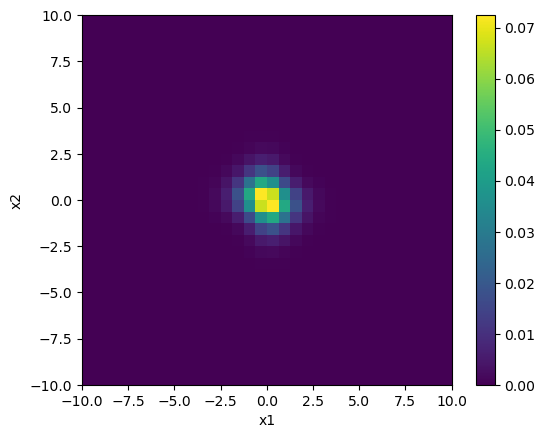

In [31]:
density = vecs[:,0].reshape(n,n)**2
density = density[::-1,:] # rearranging the order so that negative quadrants are below
plt.imshow(density, extent=(-10,10,-10,10))
plt.colorbar()
plt.xlabel("x1")
plt.ylabel("x2")
# plt.xlim(-5,5)
# plt.ylim(-5,5)

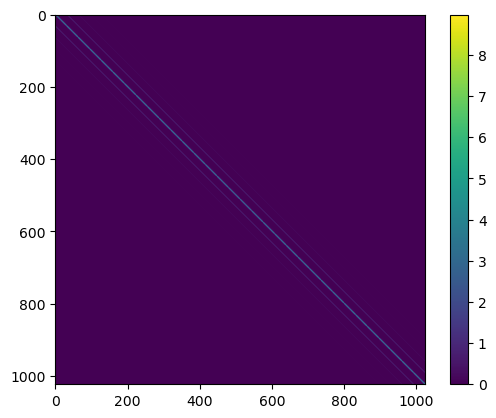

In [44]:
atol = 1e-16
heatmap = np.zeros(h.shape)
for i in range(n**2):
    for j in range(n**2):
        if abs(h[i,j]) > atol:
            heatmap[i,j] =  h[i,j]
plt.imshow(abs(heatmap))
plt.colorbar()